# Using the last version of altair

By default, the last version might not be installed, you can install it through the following code:


In [2]:
!pip install altair==5.5.0

# First steps with Altair
## Hands-on practical work

### Altair declarative visualization process:

- Get the data
- Store it into a *DataFrame*
- Call the *alt.Chart()* function with the data as a parameter
- Define the marks to be used (with *mark_bar*, *mark_point*...)
- Design the visualization by setting the visual variables with *.encode()*
- Eventually, lay out many different charts
- Eventually, define the interactions

# Basic example: A simple bar chart

In [3]:
#@title First example: a custom bar chart
import altair as alt
import pandas as pd

# Data
data = pd.DataFrame(
    {'Country': ['Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania',
                 'Netherlands', 'Belgium', 'Czech Republic', 'Greece'],
     'Population (Millions)': [83.155, 67.657, 59.236, 47.399, 37.840,
                               19.202, 17.475, 11.555, 10.702, 10.679]})

# Creating the chart, with mark_bar to define a bar chart
alt.Chart(data).mark_bar().encode(
    alt.X('Country:N'),                 # Categories in X axis
    alt.Y('Population (Millions):Q'),   # Length of the bars in Y
).properties(title = 'Population')      # Title of the chart

alt.Chart(...)

The altair method Chart receives as a parameter the dataframe containing the data. And it lets us define the marks that are going to be used for the visual encoding, as well as how these marks are configured. Note that, although we used the command mark_bar, what we are encoding is the length parameter.
Besides, we call another method, named "encode", that is used to define how the marks appear on screen, what parameters are used to create them. In this case, we are saying that the marks have an X position, determined by the name of the country, and a Y position, that depends on the population. Altair automatically infers that, since we are plotting bar charts, the population needs to be encoded as the length of the bars, and that we need to create several bars, one next to each other (as many as different values we have for the "Country" variable").


We can now change the configuration so that each bar is encoded in a different color. To do so, we change the parameters that the "encode" function receives. In this case, we ask Altair to change the color of the bars according to a variable, the country name. This can be made in a very simple way:

In [4]:
#@title Bar charts with colors per categories
import altair as alt
import pandas as pd

# Data
data = pd.DataFrame(
    {'Country': ['Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania',
                 'Netherlands', 'Belgium', 'Czech Republic', 'Greece'],
     'Population (Millions)': [83.155, 67.657, 59.236, 47.399, 37.840,
                               19.202, 17.475, 11.555, 10.702, 10.679]})

alt.Chart(data).mark_bar().encode(
    alt.X('Country:N'),
    alt.Y('Population (Millions):Q'),
    alt.Color('Country')                # Color depends on the population value
).properties(title = 'Population')

alt.Chart(...)

Altair provides a number of ways to encode the marks. Though the names do not directly map to the actual marks (e.g., a line chart is called mark_line, but the actual marks in a line chart are points, since these are the ones that change directly with the X and Y encodings. Lines are plotted to join points).


In [5]:
#@title Scatterplot

import altair as alt
import pandas as pd

# Data of the different iPhone models with release year, and release price
data = {'name': ['iPhone', 'iPhone 3G', 'iPhone 3GS', 'iPhone 4', 'iPhone 4S',
                 'iPhone 5', 'iPhone 5S', 'iPhone 6', 'iPhone 6S', 'iPhone 7',
                 'iPhone X', 'iPhone XS', 'iPhone 11 Pro', 'iPhone 12 Pro'],
        'year': ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                 '2015', '2016', '2017', '2018', '2019', '2020'],
        'price': [499, 599, 699, 599, 649, 649, 649, 649, 699,
                  649, 999, 999, 1099, 1099]}

# Create a DataFrame with this data
df = pd.DataFrame(data)

alt.Chart(df).mark_point().encode(          # This chart uses points as marks
    alt.X('year:O'),
    alt.Y('price:Q'),
).properties(title = 'Apple smartphones 2007-2020')

alt.Chart(...)

# Marks
We can change the configuration of the marks. You have the following basic options: mark_line, mark_area, mark_circle... but also other types such as mark_rule, mark_tick, mark_trail, mark_text...
Test with those types...


In [6]:
#@title Text mark

data = pd.DataFrame(
    {'Country': ['Germany', 'France', 'Italy', 'Spain', 'Poland'],
     'Population (Millions)': [83.15, 67.65, 59.23, 47.39, 37.84]})


alt.Chart(data).mark_text().encode(
    alt.X('Country:N'),
    alt.Y('Population (Millions):Q'),
    text = 'Population (Millions)'
).properties(title = 'Population')


alt.Chart(...)

# Exercises

Try simple charts (same data than above) with the following marks:

- Line mark
- Area mark
- Rule mark
- Circle mark



Now let's try to illustrate the smartphones chart with some text identifying the mobiles... This can be addressed in several ways.


In [7]:
#@title Text marks may lead to clutter
import altair as alt
import pandas as pd

# Data of the different iPhone models with release year, and release price
data = {'name': ['iPhone', 'iPhone 3G', 'iPhone 3GS', 'iPhone 4', 'iPhone 4S',
                 'iPhone 5', 'iPhone 5S', 'iPhone 6', 'iPhone 6S', 'iPhone 7',
                 'iPhone X', 'iPhone XS', 'iPhone 11 Pro', 'iPhone 12 Pro'],
        'year': ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                 '2015', '2016', '2017', '2018', '2019', '2020'],
        'price': [499, 599, 699, 599, 649, 649, 649, 649, 699,
                  649, 999, 999, 1099, 1099]}

df = pd.DataFrame(data)

alt.Chart(df).mark_text().encode(
    alt.X('year:O'),
    alt.Y('price:Q'),
    alt.Text('name')
).properties(title = 'Apple smartphones 2007-2020')

alt.Chart(...)

This might become cluttered.
Maybe we can add the text only on hover... This could be achieved with a tooltip.

In [8]:
#@title Scatterplot with tooltip

import altair as alt
import pandas as pd

# Data of the different iPhone models with release year, and release price
data = {'name': ['iPhone', 'iPhone 3G', 'iPhone 3GS', 'iPhone 4', 'iPhone 4S',
                 'iPhone 5', 'iPhone 5S', 'iPhone 6', 'iPhone 6S', 'iPhone 7',
                 'iPhone X', 'iPhone XS', 'iPhone 11 Pro', 'iPhone 12 Pro'],
        'year': ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                 '2015', '2016', '2017', '2018', '2019', '2020'],
        'price': [499, 599, 699, 599, 649, 649, 649, 649, 699,
                  649, 999, 999, 1099, 1099]}

# Create a DataFrame with this data
df = pd.DataFrame(data)

alt.Chart(df).mark_point(
    shape = 'square', filled = True).encode( # Use filled points with square shape
    alt.X('year:O'),
    alt.Y('price:Q'),
    tooltip = 'name'                        # The name will appear on hover
).properties(title = 'Apple smartphones 2007-2020')

alt.Chart(...)



---



# Loading data

In [9]:
#@title Loading the Vega datasets

import altair as alt
import pandas as pd
from vega_datasets import data


As we have seen, the data can be uploaded to Altair using dataframes. We can get several data samples from the vega datasets repository. In Altair, you would do it as follows:

You can check the available datasets here: https://github.com/vega/vega-datasets/tree/main/data



For example, for loading the stocks dataset, and plot it as a line chart, we could do the following:


In [10]:
import altair as alt
import pandas as pd
from vega_datasets import data

df = data.stocks.url

alt.Chart(df).mark_line(
    ).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
).transform_calculate(
    year='year(datum.date)'
    )

alt.Chart(...)

Note that the stock prize of Google did not appear until 2005 and on. We could filter out the data of the previous year with a simple filtering operation:

# Simple filtering

We can filter the data using a *transform_filter()* function that uses *alt.datum* and an expression to define the fields we want to filter in.

In [11]:
#@title Example with transform_filter
import altair as alt
import pandas as pd
from vega_datasets import data

df = data.stocks.url

alt.Chart(df).mark_line(
    ).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
).transform_calculate(
    year='year(datum.date)'
    ).transform_filter(       # Filtering per year
        alt.datum.year > 2005)

alt.Chart(...)

You can use expressions in filters to combine multiple conditions, as well as using modifiers such as the negation (~), or (|), or and (&).

In [12]:
#@title Example with transform_filter with predicate and expression
import altair as alt
import pandas as pd
from vega_datasets import data

df = data.stocks.url

alt.Chart(df).mark_line(
    ).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
).transform_calculate(
    year='year(datum.date)'
    ).transform_filter(       # Filtering per year and oneOf predicate
        alt.FieldOneOfPredicate(field = 'symbol', oneOf= ['GOOG', 'MSFT'])
        & ~(alt.datum.year <= 2005)
        )

alt.Chart(...)



---



## Data input

Data typically comes in two forms in a Dataframe: wide and long

### Wide form

In [13]:
wide_form = pd.DataFrame({'Date': ['2007-10-01', '2007-11-01',
                                   '2007-12-01'],
                          'AAPL': [189.95, 182.22, 198.08],
                          'AMZN': [89.15, 90.56, 92.64]})
print(wide_form)

         Date    AAPL   AMZN
0  2007-10-01  189.95  89.15
1  2007-11-01  182.22  90.56
2  2007-12-01  198.08  92.64


### Long form (which is the preferred by altair)

In [14]:
long_form = pd.DataFrame({'Date': ['2007-10-01', '2007-11-01', '2007-12-01',
                                   '2007-10-01', '2007-11-01', '2007-12-01'],
                          'company': ['AAPL', 'AAPL', 'AAPL',
                                      'AMZN', 'AMZN', 'AMZN'],
                          'price': [189.95, 182.22, 198.08,
                                    89.15, 90.56, 92.64]})
long_form

,Date,company,price
0,2007-10-01,AAPL,189.95
1,2007-11-01,AAPL,182.22
2,2007-12-01,AAPL,198.08
3,2007-10-01,AMZN,89.15
4,2007-11-01,AMZN,90.56
5,2007-12-01,AMZN,92.64




---



# Data types
Altair supports five data types:


*   **Quantitative:** a continuous real-valued quantity
*   **Ordinal**: a discrete ordered quantity
*   **Nominal:** a discrete unordered category
*   **Temporal:** a time or date value
*   **geojson:** a geographic shape


that can be specified explicitly (verbosely or shorthand) in the encode method of the chart.

In [15]:
#@title Explicit encoding in the functions
from vega_datasets import data

cars = data.cars.url

alt.Chart(cars).mark_point().encode(
    alt.X('Acceleration', type='quantitative'),
    alt.Y('Miles_per_Gallon', type='quantitative'),
    alt.Color('Origin', type='nominal')
)

alt.Chart(...)

This is equivalent to:



In [16]:
#@title Scatterplot
from vega_datasets import data

cars = data.cars.url

alt.Chart(cars).mark_point().encode(
    alt.X('Acceleration:Q'),
    alt.Y('Miles_per_Gallon:Q'),
    alt.Color('Origin:N')
)

alt.Chart(...)

And it is also equivalent to this notation:

In [17]:
#@title Scatterplot
from vega_datasets import data

cars = data.cars.url

alt.Chart(cars).mark_point().encode(
    x = 'Acceleration:Q',
    y = 'Miles_per_Gallon:Q',
    color = 'Origin:N'
)

alt.Chart(...)



---



#Channels configuration
##Visual properties
####Color:
* **color**: default color of the mark
* **fill**: color that fills the mark (has higher precedence than color)
* **fillOpacity**: float indicating the opacity [0..1]
* **filled**: boolean indicating whether the mark is filled
* **opacity**: float indicating the overall opacity [0..1]
* **strokeOpacity**: float indicating the stroke opacity [0..1]

####Shape and position:
* **height**: height of the marks
* **shape**: for point marks, shape can be
circle, square, cross, diamond, triangle up, triangle down, triangle right, or triangle left
* **Other shapes**: arrow, wedge, triangle
* **A custom SVG path** (defined in a rectangle between -1 and 1)
* **size**: the size of the shape. For point, circle and square, it will be the pixel area of the marks.
* **x**: X coordinates of the marks, or width of horizontal bars (and area marks).
* **y**: Y coordinates of the marks, or height of vertical bars (and area marks).
* **x2**: X2 coordinates for ranged shapes (area, bar, rect, and rule)
* **y2**: Y2 coordinates for ranged shapes (area, bar, rect, and rule)
* **width**: width of the marks.

####Other properties refered to the strokes:
* **stroke**: Default color for the stroke. It has higher precedence than default color (defined using config.color)
* **strokeDash**: An array of alternating stroke and space lengths, for creating dashed or dotted lines, that may depend on the encoding.
* **strokeWidth**: The width of the stroke, in pixels.
* **thickness**: thickness of the tick mark.
* **tooltip**: Tooltip text to show upon mouse hover over the object.

# Exercises

### Modify the last chart so that:


- Marks are triangles
- Marks are all crimson (color)
- Marks are all squares
- Marks are diamonds
- Change the opacity of the marks to 0.2
- Change the size of the marks to 50
- Change the opacity of the marks, and make it dependent on the y variable
- Change the opacity of the marks based on another variable


# Changing the line properties

In [18]:
#@title Example
from vega_datasets import data
df = data.us_employment.url
alt.Chart(df).mark_line(
    strokeDash=[10,50],
    stroke = 'black',
    strokeWidth = 5,
    strokeOpacity = 0.5,
    size = 10,
).encode(
    alt.X('month:T'),
    alt.Y('construction:Q')
)

alt.Chart(...)

In [73]:
#@title Example
from vega_datasets import data
df = data.us_employment.url
alt.Chart(df).mark_point(shape='diamond',
    strokeDash=[3,7],
    color = "purple",
    stroke = 'crimson',
    strokeWidth = 5,
    strokeOpacity = 0.6,
    size = 50,
).encode(
    x='month:T',
    y='government:Q'
)

alt.Chart(...)

# Changing the format of the axes

In [82]:
#@title: Changing the format of the labels
import altair as alt
from vega_datasets import data

source = data.jobs.url

alt.Chart(source).mark_line().encode(
    alt.X('year:O'),
    alt.Y('perc:Q', axis=alt.Axis(format='%')),
    color='sex:N'
).transform_filter(
    alt.datum.job == 'Welder'
)


alt.Chart(...)

# Exercises


*   Change the color of the line
*   Change the pattern





---



# Visualization techniques

# Bar charts

Data: One key one value

Marks: Lines

Tasks: Compare/lookup (really easy)

May scale to hundreds of elements

Guidelines:
- **Always** start at zero
- Make labels easy to read (horizontal if possible)
- Order based on data or labels
- By default, prefer neutral colors
- Gridlines if precision is required
- If data is ordered (e.g., in time), line charts typically better
- Don't use hundreds of bars


In [21]:
#@title Horizontal bar chart
import altair as alt
import pandas as pd

data = pd.DataFrame({'Country': ['Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Netherlands', 'Belgium', 'Czech Republic', 'Greece'],
        'Population (Millions)': [83.155, 67.657, 59.236, 47.399, 37.840, 19.202, 17.475, 11.555, 10.702, 10.679]})



alt.Chart(data).mark_bar().encode(
    alt.X('Population (Millions):Q'),
    alt.Y('Country:N'),
).properties(title = 'Population')

alt.Chart(...)

# Grouped/Paired bar charts

Data: Two keys (categories), one value (quantitative)

Marks: Lines

Tasks: Compare/lookup (easier within group than between groups)

Scales laess than simple bar charts

Trends may difficult to perceive, even with small groups

Guidelines:
- **Always** start at zero
- Same as bar charts
- Don't use them if one category is time

In [22]:
#@title Grouped bar chart

import altair as alt
from vega_datasets import data

source = data.barley() # Dimensions: year (2 values), site, yield, variety

alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='sum(yield):Q',
    color='year:N',
    column='site:N' # To create the groups
)

alt.Chart(...)

# Stacked bar charts

Data: Two keys, one value

Tasks: Compare/lookup (not so easy)

Scales less than bar charts

Main benefit is that we can see the total quantity

May become difficult to read

Guidelines:
- **Always** start at zero
- Same as bar charts
- Difficult to compare bewteen groups
- Difficult to compare within groups
- Not use when total quantity does not make sense
- Use with few categories

In [23]:
#@title Stacked bar chart

import altair as alt
import pandas as pd
from vega_datasets import data

df = data.cars.url

alt.Chart(df).mark_bar().encode(
    x=alt.X('Miles_per_Gallon:Q', bin=True),
    y='count(Miles_per_Gallon):Q',
    color = 'Origin:N'
)

alt.Chart(...)

# Dot plot

AKA Cleveland dot plot

Mark: Point

Visual variable: X position

Guidelines:

- Do not need to start at zero
- Must be ordered by quantity
- Suitable when small differences must be shown
- If values are relevant, label axes suitably

In [24]:
#@title Dot plot

import pandas as pd

data = {'Country': ['Hong Kong', 'Japan', 'Macao', 'Switzerland', 'Singapore', 'Italy', 'US', 'Vietnam'],
        'Life Expectancy': [85.29, 85.03, 84.68, 84.25, 84.07, 84.01, 79.11, 75.77]}

df = pd.DataFrame(data)

alt.Chart(df).mark_circle(opacity = 1).encode(
    alt.X('Life Expectancy:Q', scale=alt.Scale(domain=(70,90))),
    alt.Y('Country:N', sort='-x'),
).properties(title = 'Life expectancy')

alt.Chart(...)

# Scatterplots

Data: Two (quantitative) values, no keys

Mark: Point

Visual channel: Position in 2D plane

Task: Find correlations

Guidelines:
- Avoid clutter
- May use transparency to reduce the effect of overlapping points
- If the goal is to show trends, may enhance the plot with a trend line
- Start axes at meaningful values (oftentimes zero is not the value to choose)


In [25]:
#@title Example of a simple scatterplot

import altair as alt
import pandas as pd

data = {'name': ['iPhone', 'iPhone 3G', 'iPhone 3GS', 'iPhone 4', 'iPhone 4S', 'iPhone 5', 'iPhone 5S', 'iPhone 6', 'iPhone 6S', 'iPhone 7', 'iPhone X', 'iPhone XS', 'iPhone 11 Pro', 'iPhone 12 Pro'],
        'year': ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
        'price': [499, 599, 699, 599, 649, 649, 649, 649, 699, 649, 999, 999, 1099, 1099]}

df = pd.DataFrame(data)

alt.Chart(df).mark_circle().encode(
    alt.X('year:O'),
    alt.Y('price:Q'),
    alt.Tooltip('name')
).properties(title = 'Apple smartphones')

alt.Chart(...)

In [26]:
#@title Pie charts

import pandas as pd
import altair as alt

source = pd.DataFrame({"category": ['orange', 'pear', 'apple',
                                    'lemon', 'plum'],
                       "value": [4, 6, 10, 3, 7]})

alt.Chart(source).mark_arc().encode(
    theta=alt.Theta("value"),
    order = alt.Order('value', sort = 'descending'),
    color="category:N"
)

alt.Chart(...)

# Pie charts

Data: One key and one value

Mark: Area

Visual channel: Angle

Task: Estimate proportions

Guidelines:
- Do not use more than a few quantity
- Sort them from larger to smaller, clokwise
- Do not use them  (they can be difficult to read)


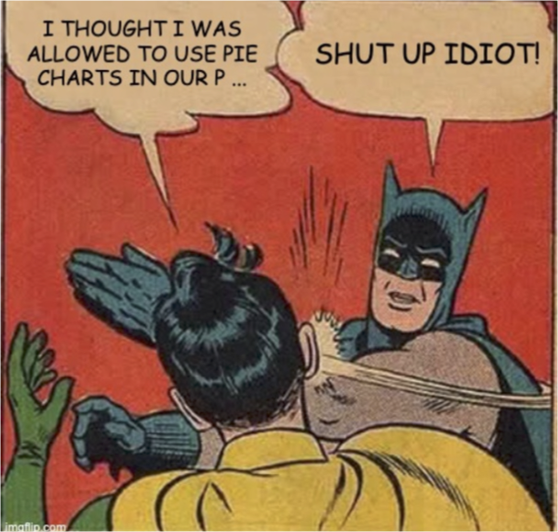

In [27]:
#@title Donut chart example
import pandas as pd
import altair as alt

source = pd.DataFrame({"category": ['orange', 'pear', 'apple', 'lemon', 'plum'], "value": [4, 6, 10, 3, 7]})

alt.Chart(source).mark_arc(innerRadius = 70).encode(
    theta=alt.Theta("value"),
    order = alt.Order('value', sort = 'descending'),
    color="category:N",
)


alt.Chart(...)

# Bubble charts
We can configure the size of the circles by encoding the units sold. This would yield a bubble chart.
Bubble charts can increase the number of variables we encode. The following are the most common visual variables used:
- Size
- Color

But we can use other, such as angle, shape, etc.
For their design, precautions have to be made, similar to scatterplots. In this case, the size of the bubbles will be a more relevant source of potential clutter.

In [28]:
#@title Example of a bubble chart

import altair as alt
import pandas as pd

data = {'name': ['iPhone', 'iPhone 3G', 'iPhone 3GS', 'iPhone 4', 'iPhone 4S', 'iPhone 5', 'iPhone 5S', 'iPhone 6', 'iPhone 6S', 'iPhone 7', 'iPhone X', 'iPhone XS', 'iPhone 11 Pro', 'iPhone 12 Pro'],
        'year': ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
        'price': [499, 599, 699, 599, 649, 649, 649, 649, 699, 649, 999, 999, 1099, 1099],
        'units_sold': [1.39, 11.63, 20.73, 73.17, 37.04, 27.40, 51.03, 74.47, 78.29, 77.32, 52.22, 45.09, 18.68, 119]}

df = pd.DataFrame(data)

alt.Chart(df).mark_circle(opacity = 1).encode(
    alt.X('year:O'),
    alt.Y('price:Q'),
    alt.Size('units_sold:Q'),
    alt.Tooltip('name')
).properties(title = 'Apple smartphones')

alt.Chart(...)

# Line charts

Data: One key (quantitative or ordered), one value

Mark: Points (lines connect the points, but the marks are points)

Channels: Position in 2D, lines to connect

Taks: Communicating trends

Guidelines
- Mute gridlines: they should be used as reference, but not be as visually relevant as the lines of the chart.
- Do not add too many labels in axes.
- If data is far from zero, it is not necessary to start at zero, and may be better to start at a different point.
- Label lines directly, instead of using a legend, when possible. It may facilitate the reading.
- Try to make all text horizontal, instead of vertical or diagonal.
- Do not use too many colors. If too many lines are required, use large palettes with care. Might need to use a different design.



In [ ]:
#@title Example of a line chart

import altair as alt
import pandas as pd

data = {'name': ['iPhone', 'iPhone 3G', 'iPhone 3GS', 'iPhone 4', 'iPhone 4S', 'iPhone 5', 'iPhone 5S', 'iPhone 6', 'iPhone 6S', 'iPhone 7', 'iPhone X', 'iPhone XS', 'iPhone 11 Pro', 'iPhone 12 Pro'],
        'year': ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
        'price': [499, 599, 699, 599, 649, 649, 649, 649, 699, 649, 999, 999, 1099, 1099]}

df = pd.DataFrame(data)

alt.Chart(df).mark_line().encode(
    alt.X('year:O'),
    alt.Y('price:Q'),
    alt.Tooltip('name')
).properties(title = 'Price of Apple smartphones')

alt.Chart(...)

In [30]:
#@title Another example, with more lines

import altair as alt
import pandas as pd
from vega_datasets import data

df = data.iowa_electricity()


alt.Chart(df).mark_line().encode(
    alt.X('year:T'),
    alt.Y('net_generation:Q'),
    color = 'source:N'
)


alt.Chart(...)

In [31]:
#@title Another example, with more lines

import altair as alt
import pandas as pd
from vega_datasets import data

wide_form = pd.DataFrame(data.jobs())

long_form = wide_form.melt(id_vars=['year','job','sex'] , value_vars='count')


alt.data_transformers.disable_max_rows()

alt.Chart(long_form).mark_line().encode(
    x = 'year:O',
    y = 'sum(value):Q',
    color = 'job'
)

alt.Chart(...)

# Exercises

- Make the previous line chart readable. Think what can be done to improve it.
- Use an appropriate color palette for the resulting chart.

# More complex charts

In [32]:
#@title Normalized area chart

df = data.iowa_electricity()

alt.Chart(df).mark_area(opacity = 0.6).encode(
    alt.X('year:T'),
    alt.Y('net_generation:Q', stack = 'normalize'),
    alt.Color('source:N')
)

alt.Chart(...)

In [33]:
#@title Connected scatterplot

df = data.driving()

alt.Chart(df).mark_line(point = True).encode(
    alt.X('miles:Q').scale(zero = False),
    alt.Y('gas:Q').scale(zero = False),
    alt.Order('year:O'),
)

alt.Chart(...)

In [34]:
#@title Variable line width using trails

df = data.iowa_electricity()

alt.Chart(df).mark_trail().encode(
    alt.X('year:T'),
    alt.Y('net_generation:Q', title = 'Net generation'),
    alt.Color('source:N'),
    alt.Size('net_generation')
)

alt.Chart(...)

In [35]:
#@title Strip chart using offsets and transform_calculate
from vega_datasets import data
import pandas as pd
source = data.seattle_weather.url

alt.Chart(source, title = 'Precipitation').mark_circle().encode(
    alt.X('weather:N', title = 'Weather'),
    alt.Y('precipitation:Q', title = 'Precipitation (mm)'),
    alt.Color('weather:N').legend(None),
    xOffset = 'jitter:Q'
).transform_calculate(
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
)


alt.Chart(...)

# Exercises

- Change the colors opacities to be proportional to one variable.
- Change the color palette so that sun has a yellowish color, fog as gray, etc.

In [36]:
import pandas as pd
import altair as alt
import numpy as np

source = pd.DataFrame({"mobile system": ['iOS', 'Android', 'Tizen',
                                    'Other'],
                       "percentage": [60, 35, 4, 1],
                       "sector": [0, 0.5*np.pi,
                                  1.*np.pi, 1.5*np.pi],
                       "sector2": [0.5*np.pi, np.pi,
                                   1.5*np.pi,2.*np.pi]})

alt.Chart(source).mark_arc(innerRadius = 20, stroke="#fff").encode(
    theta=alt.Theta(field = 'sector',
                    type = 'quantitative', scale = None),
    theta2 = 'sector2:Q',
    radius = alt.Radius("percentage",
                        scale = alt.Scale(type = "sqrt",
                        zero = True, rangeMin = 20)),
    color=alt.Color(field="mobile system", type="nominal"),
)


alt.Chart(...)

In [37]:
#@title Equivalent chart to the previous one, but now as a donut chart

import pandas as pd

source = pd.DataFrame({"mobile system": ['iOS', 'Android',
                                         'Tizen', 'Other'],
                       "percentage": [60, 35, 4, 1]})

alt.Chart(source).mark_arc(innerRadius = 80).encode(
    theta= alt.Theta(field = 'percentage', type = 'quantitative'),
    order = alt.Order('percentage', sort = 'descending'),
    color= alt.Color(field="mobile system", type="nominal",
                     scale = alt.Scale(scheme = 'dark2')),
)


alt.Chart(...)

# Heat Maps

Heat maps encode values in a regular matrix.

Data: Two categories or indices (sometimes ordered, sometimes not) and one value

Marks: are areas

Tasks: Detect clusters, outliers, trends (if some index is ordered)

In [38]:
#@title Heatmap of github data

import altair as alt
from vega_datasets import data

githubData = data.github.url

alt.Chart(githubData).mark_rect().encode(
    alt.X('hours(time):O', title = 'Hour'),
    alt.Y('day(time):O', title = 'Day'),
    alt.Color('sum(count):Q',
              legend = alt.Legend(title='Contributions'))
)

alt.Chart(...)

In [39]:
#@title Heatmap of the IMDB movies database

import altair as alt
from vega_datasets import data

movies = data.movies.url

alt.Chart(movies).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin = True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin = True),
    alt.Color('count()',
              scale= alt.Scale(scheme = 'oranges'),
              legend= alt.Legend(title = 'Total Records'))
)

alt.Chart(...)

In [40]:
#@title Confidence intervals and average line

df = data.stocks.url


chArea = alt.Chart(df).mark_area(opacity = 0.5).encode(
    alt.X('date:T', timeUnit = 'year').title('Year'),
    alt.Y('ci0(price):Q'),
    alt.Y2('ci1(price):Q'),
    alt.Color('symbol:N')
)

chLine = alt.Chart(df).mark_line().encode(
    alt.X('date:T', timeUnit = 'year').title('Year'),
    alt.Y('average(price):Q'),
    alt.Color('symbol:N')
)

chArea + chLine

alt.LayerChart(...)

In [41]:
#@title Confidence intervals and average line
import pandas as pd

df = pd.read_csv(data.stocks.url)


df['date'] = pd.to_datetime(df['date'], format='%b %d %Y')
df['year'] = df['date'].dt.year

chArea = alt.Chart(df).mark_area(opacity = 0.5).encode(
    alt.X('year:O', axis = alt.Axis(labelColor = 'gray', labelAngle = 45)).title('Year'),
    alt.Y('ci0(price):Q'),
    alt.Y2('ci1(price):Q'),
    alt.Color('symbol:N')
).transform_filter(alt.datum.year > 2004)

chLine = alt.Chart(df).mark_line().encode(
    alt.X('year:O').title('Year'),
    alt.Y('average(price):Q'),
    alt.Color('symbol:N')
).transform_filter(alt.datum.year > 2004)

(chArea + chLine).properties(width = 400)

alt.LayerChart(...)

In [42]:
#@title Streamgraph

df = data.us_employment()

df2 = df.melt('month', var_name = 'Employees',
              value_name = 'amount')

alt.Chart(df2).mark_area().encode(
    alt.X('yearmonth(month):T',
          axis = alt.Axis(format = '%Y',
                          domain = False,
                          tickSize = 0)),
    alt.Y('sum(amount):Q', stack = 'center', axis = None),
    alt.Color('Employees:N')
)

alt.Chart(...)

In [43]:
#@title Adding error bars

cars = data.cars.url

base = alt.Chart(cars).mark_bar().encode(
    alt.X('Cylinders:O'),
    alt.Y('mean(Miles_per_Gallon):Q', title = 'Average MPG'),
)

errorbars = alt.Chart(cars).mark_errorbar(extent = 'ci').encode(
    alt.X('Cylinders:O'),
    alt.Y('Miles_per_Gallon:Q')
)
base + errorbars

alt.LayerChart(...)

# Exercises

- Change the labels to horizontal.
- Change the bars to horizontal. Change the titles of the axes so that they make more sense (with real names).

In [44]:
#@title Box plots

cars = data.cars()

alt.Chart(cars).mark_boxplot().encode(
    alt.X('Cylinders:O'),
    alt.Y('Miles_per_Gallon:Q', title = 'MPG'),
)


alt.Chart(...)

In [45]:
#@title Box plots with Interquartile Range (IQR) * 3.0



cars = data.cars()

alt.Chart(cars).mark_boxplot(extent = 3.0).encode(
    alt.X('Cylinders:O'),
    alt.Y('Miles_per_Gallon:Q', title = 'MPG'),
)

alt.Chart(...)

In [46]:
#@title Box plots with Interquartile Range (IQR) as min-max



cars = data.cars()

alt.Chart(cars).mark_boxplot(extent = 'min-max').encode(
    alt.X('Cylinders:O'),
    alt.Y('Miles_per_Gallon:Q', title = 'MPG'),
)

alt.Chart(...)

In [47]:
#@title Box Plots with colors

iris = data.iris()
iris.head()

alt.Chart(iris).mark_boxplot().encode(
    alt.X("species:N"),
    alt.Y("sepalLength:Q"),
    alt.Color("species:N")
).properties(width=200, height=200)

alt.Chart(...)

In [48]:
#@title Modifying the width

alt.Chart(iris).mark_boxplot(size=50).encode(
    alt.X("species:N"),
    alt.Y("sepalLength:Q"),
    alt.Color("species:N", legend=None)
).properties(width=200, height=200)

alt.Chart(...)

In [49]:
#@title Using images or icons

import altair as alt
from vega_datasets import data
import pandas as pd

alt.data_transformers.disable_max_rows()

source = pd.read_csv('https://raw.githubusercontent.com/vega/vega/master/docs/data/weather.csv')


alt.Chart(source).mark_text().encode(
    alt.X('count():Q'),
    alt.Y('weather:N'),
    alt.Text('emoji:N')
).transform_calculate(
    emoji =
    "{'drizzle':'🌧', 'rain':'🌬️', 'sun':'☀️', 'snow':'❄️', 'fog':'🌫'}[datum.weather]"
)


alt.Chart(...)

In [50]:
source = pd.DataFrame.from_records([
      {"x": 0., "y": 0.5, "img":
       "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Logo_UPC.svg/110px-Logo_UPC.svg.png"},
      {"x": 1., "y": 1.5, "img":
       "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Logo_UPC.svg/110px-Logo_UPC.svg.png"},
      {"x": 2.5, "y": 1, "img":
       "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Logo_UPC.svg/110px-Logo_UPC.svg.png"}
])

alt.Chart(source).mark_image(
    width=100, height=50
).encode(
    alt.X('x'),
    alt.Y('y'),
    url='img'
)

alt.Chart(...)